# Pràctica 3: Regressió Logistica


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta práctica será molt més dirigida que l'anterior. S'evaluarán els següents conceptes sobre una mateixa base de dades, que tractarà sobre els vins:

* A. Ús LogisticRegression (20%)
* B. Regularitzadors (40%)
* C. Demostració Error de Variance (20%)
* D. Demostració Error de Bias (20%)

A continuació veurem un exemple de regressió lineal, i com es comporta el regressor logistic.

(-3, 3)

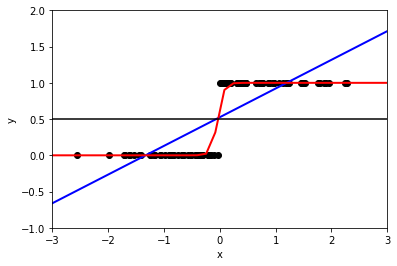

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
 

def lr_model(x):
    return 1 / (1 + np.exp(-x))

xmin, xmax = -10, 10
np.random.seed(0)
X = np.random.normal(size = 100) 

y = (X > 0).astype(np.float) 
X = X[:, np.newaxis] 
X_test = np.linspace(-4, 4, 50)

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color = 'blue', linewidth = 2)

# Logistic Regression:
clf = linear_model.LogisticRegression(C=1e2)
clf.fit(X, y)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'red', linewidth = 2)


plt.axhline(0.5, color = 'black')
plt.scatter(X, y, color = 'black')

plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-3, 3)


Per cert, recordeu el què significa el error de Variança i el de bias.

<img src="bias_variance.png" width=600 height=600 />

In [112]:
# Codi esquelet per la pràctica de la 3 sessió: Regressió Logistica

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('winequalityN.csv')
dataset = dataset.dropna()
dataset['is_red_wine'] = (dataset["type"] == 'red').astype(int)


print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (6463, 14)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [113]:
display(dataset)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red_wine
0,white,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6,0
1,white,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6,0
2,white,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6,0
3,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
4,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.800,0.620,0.080,1.900,0.068,28.000,38.000,0.997,3.420,0.820,9.500,6,1
6492,red,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5,1
6494,red,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6,1
6495,red,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5,1


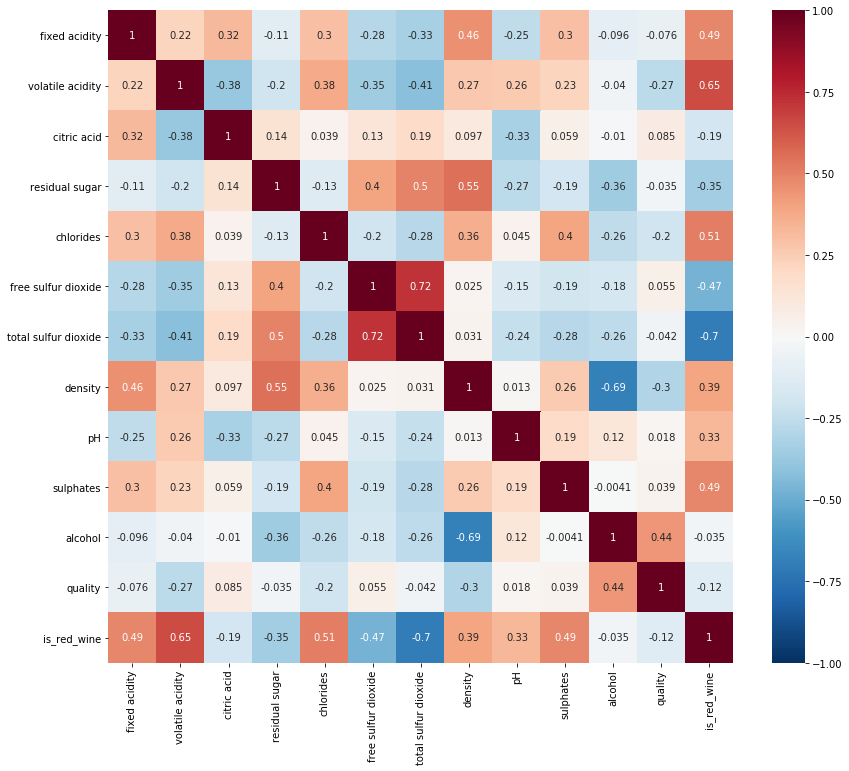

In [114]:
correlation = dataset.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

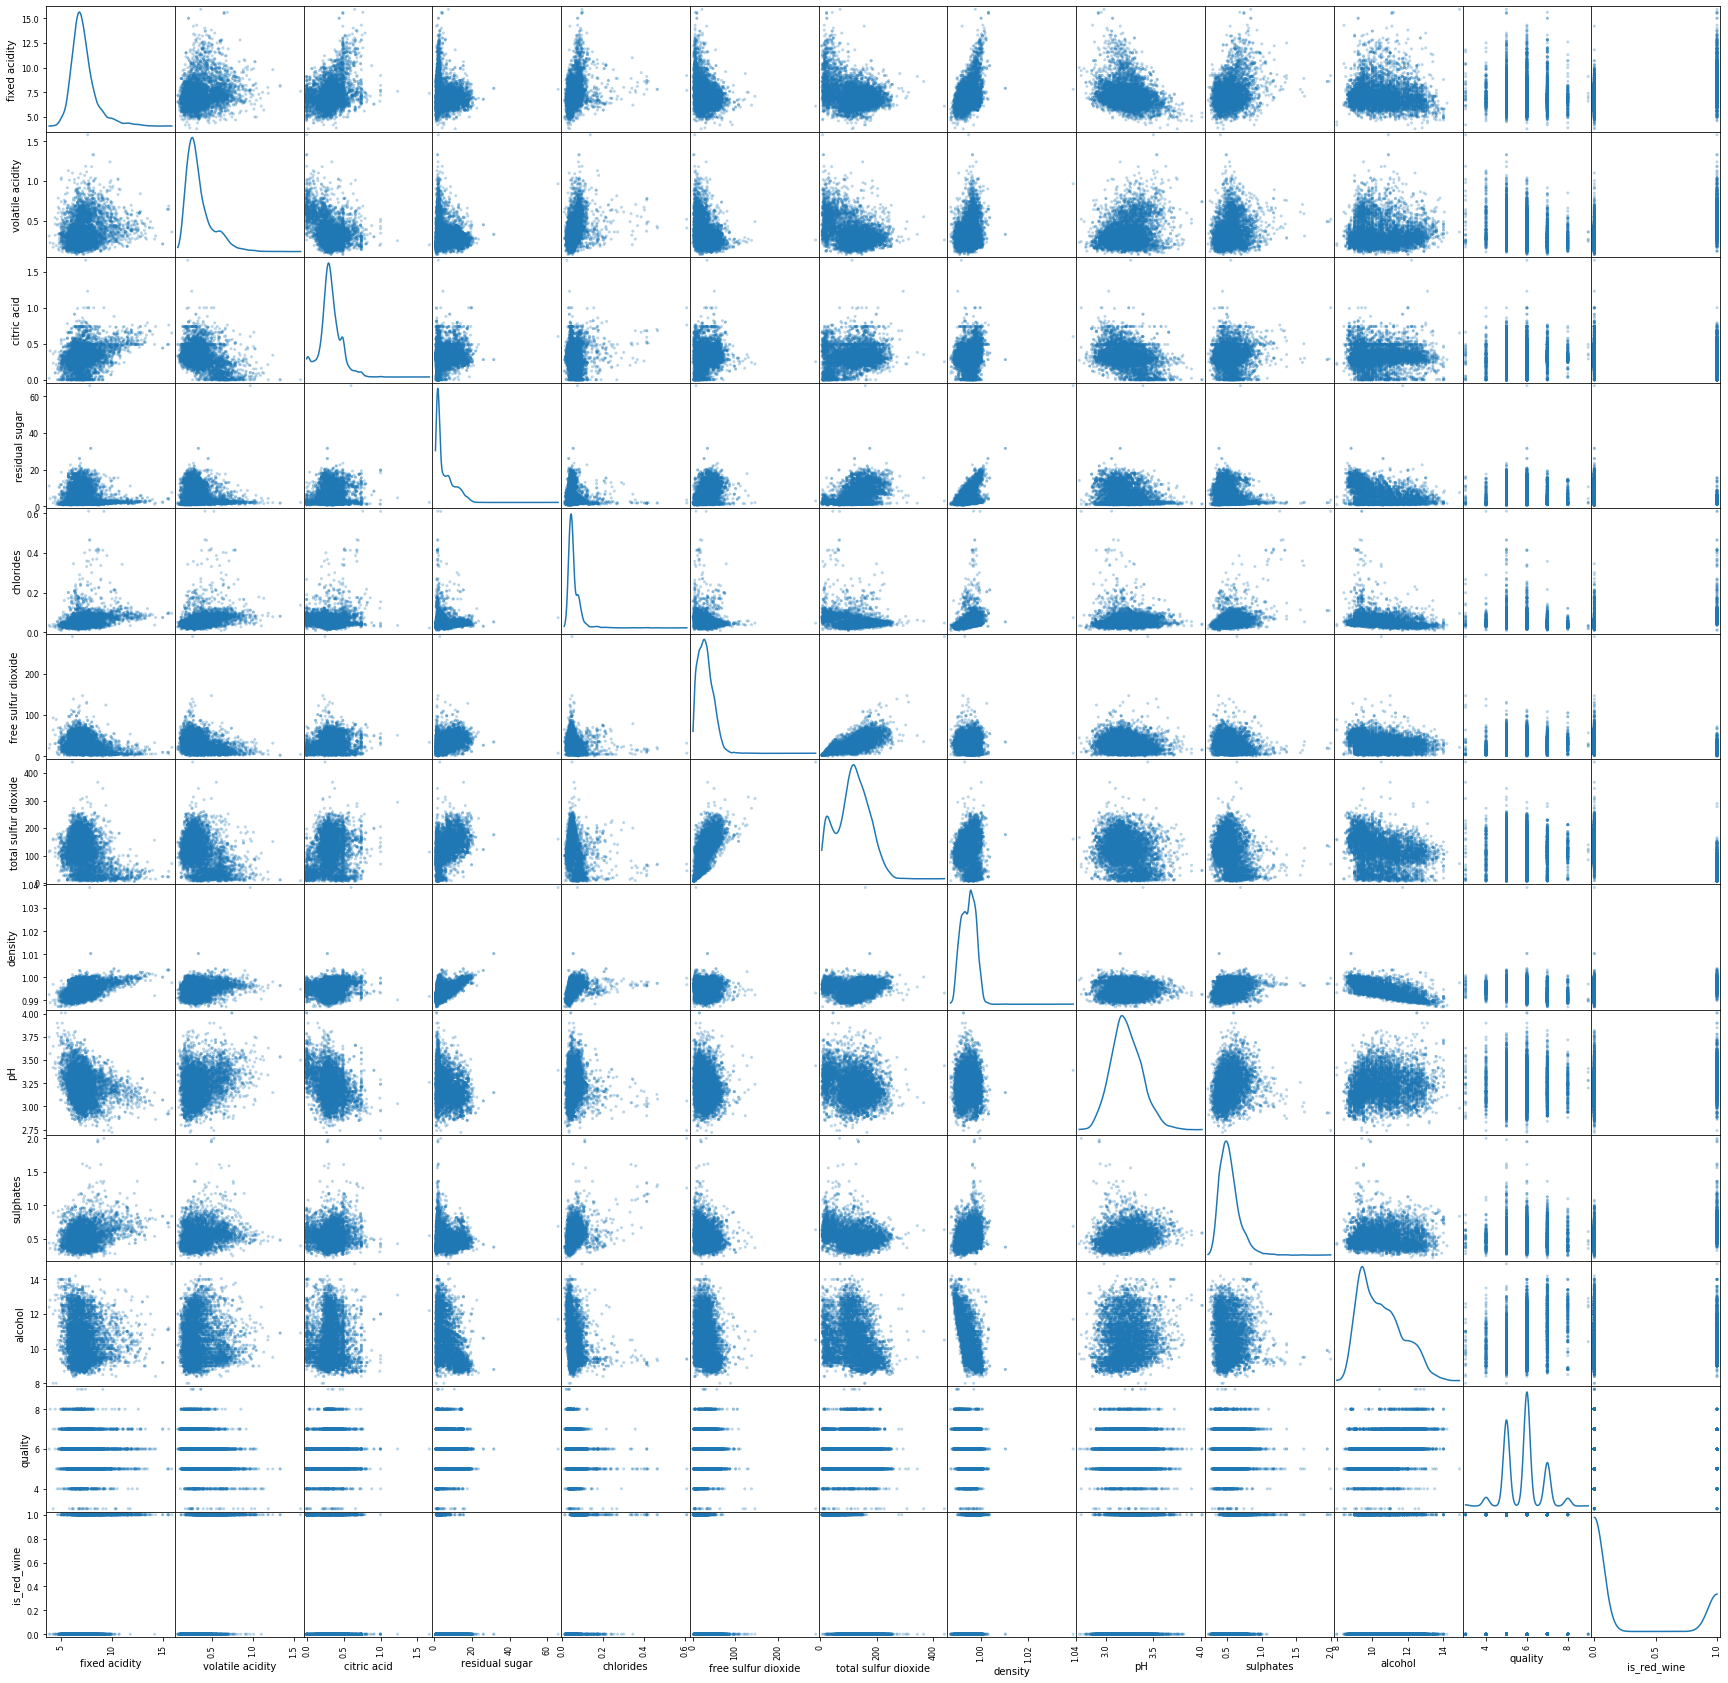

In [115]:
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

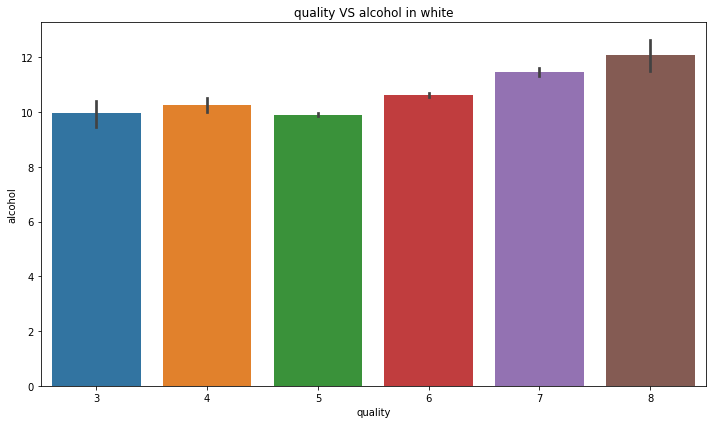

<Figure size 432x288 with 0 Axes>

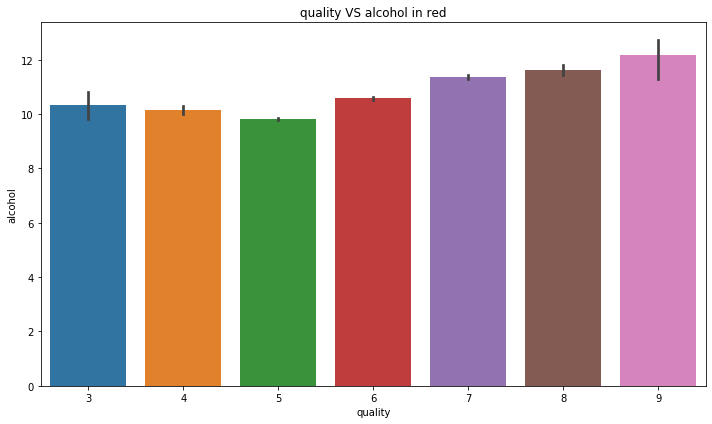

<Figure size 432x288 with 0 Axes>

In [116]:
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="red"], ax=axs)
plt.title('quality VS alcohol in white')

plt.tight_layout()
plt.show()
plt.gcf().clear()

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="white"], ax=axs)
plt.title('quality VS alcohol in red')

plt.tight_layout()
plt.show()
plt.gcf().clear()


Abans de començar amb els exercicis, preparaem les dades per a que sigui una classificació binaria

In [117]:
#Defining the splits for categories. 1-5 will be poor quality, 6-10 will be great
bins = [1,5,10]

#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1]
dataset['quality_categorical'] = pd.cut(dataset['quality'], bins=bins, labels=quality_labels, include_lowest=True)
# Split the data into features and target label
quality_raw = dataset['quality_categorical']
features_raw = dataset.drop(['quality_categorical','type','quality'],axis=1)

### BoxCox : Aproximant a una normal 

Si les dades s'assemblen molt a una normal , aproximar-les a la mateixa normal es una bona mesura per millorar les prediccions.

There are 6 higest skewed numerical features to box cox transform


,Skew,New Skew
chlorides,5.402,0.189
sulphates,1.803,0.010
fixed acidity,1.721,-0.063
volatile acidity,1.500,0.114
residual sugar,1.437,0.136
free sulfur dioxide,1.223,-0.037


chlorides


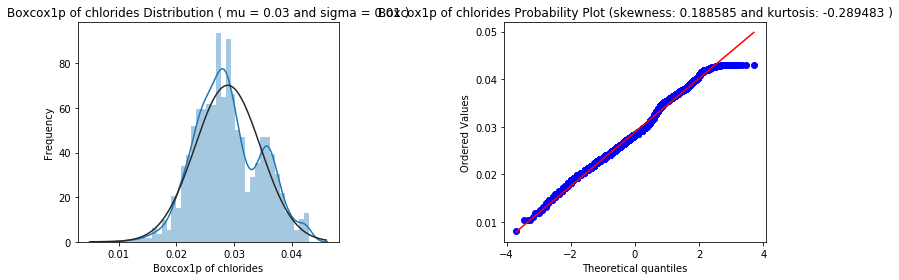

sulphates


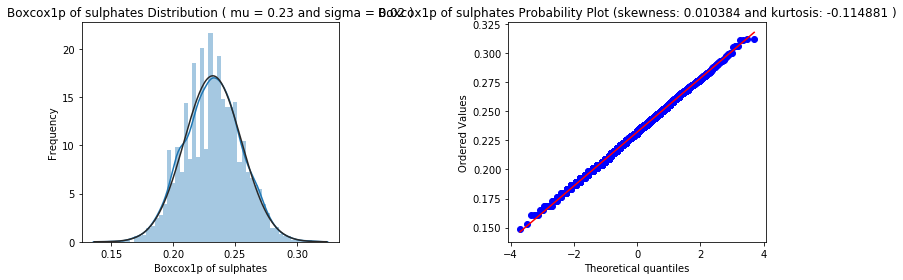

fixed acidity


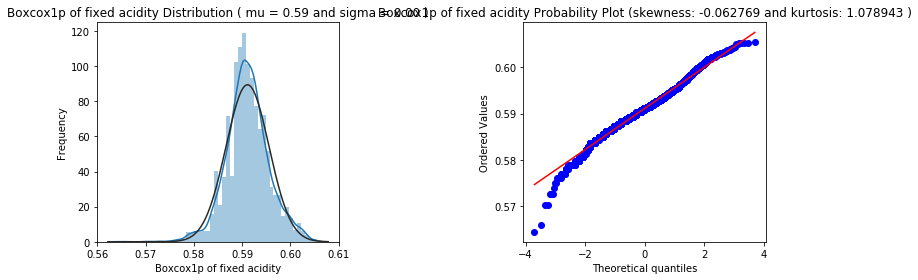

volatile acidity


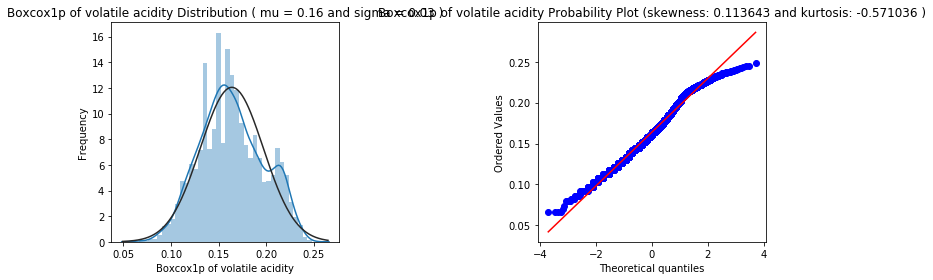

residual sugar


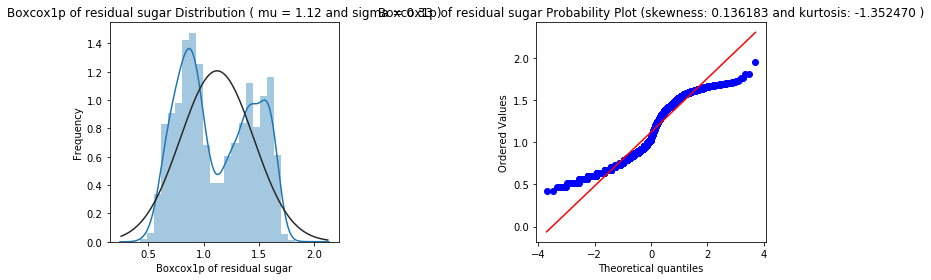

free sulfur dioxide


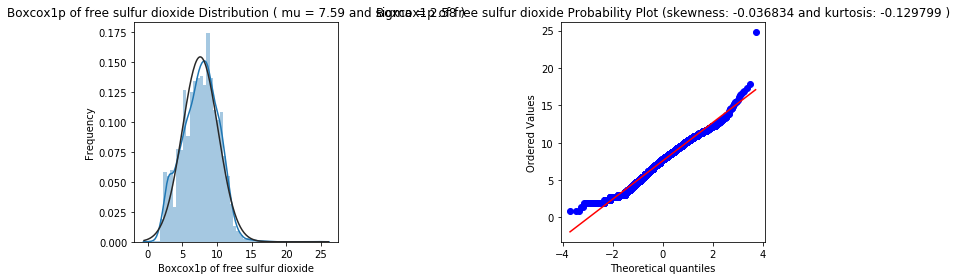

In [120]:
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
wines = dataset.copy()
numeric_features = list(wines.dtypes[(wines.dtypes != "str") & (wines.dtypes !='object')].index)
numeric_features.remove('is_red_wine')

skewed_features = wines[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness = pd.DataFrame({'Skew' :skewed_features})   

# Get only higest skewed features
skewness = skewness[abs(skewness) > 0.7]
skewness = skewness.dropna()
print ("There are {} higest skewed numerical features to box cox transform".format(skewness.shape[0]))

l_opt = {}

for feat in skewness.index:
    wines[feat], l_opt[feat] = boxcox((wines[feat]+1))

skewed_features2 = wines[skewness.index].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness2 = pd.DataFrame({'New Skew' :skewed_features2})   
display(pd.concat([skewness, skewness2], axis=1).sort_values(by=['Skew'], ascending=False))

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(12,4))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.\
                   format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()
    
for feat in skewness.index:
    print(feat)
    QQ_plot(wines[feat], ('Boxcox1p of {}'.format(feat)))



## PCA :  Principal component analysis

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def pca_analysis(df, y_train, feat):
    scale = StandardScaler()
    df = pd.DataFrame(scale.fit_transform(df), index=df.index)
    pca_all = PCA(random_state=101, whiten=True).fit(df)

    my_color=y_train

    # Store results of PCA in a data frame
    result=pd.DataFrame(pca_all.transform(df), columns=['PCA%i' % i for i in range(df.shape[1])], index=df.index)

    return result

   
cols = wines.columns
cols = list(cols.drop(['type', 'quality_categorical', 'quality']))
wine_pca = pca_analysis(wines.loc[:, cols], wines['quality_categorical'], 'Quality')
wine_pca['quality_categorical'] = wines['quality_categorical']
quality_raw2 = wine_pca['quality_categorical']
features_raw2 = wine_pca.drop('quality_categorical',axis=1)


In [146]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_raw2, 
                                                    quality_raw2, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
# Show the results of the split
print("Training set has {} samples. {:.1f}% is positive".format(X_train.shape[0], 100*sum(y_train)/y_train.shape[0]))
print("Testing set has {} samples. {:.1f}% is positive".format(X_test.shape[0], 100*sum(y_test)/y_test.shape[0]))

display(X_test)
scalar=StandardScaler()

X_train2=scalar.fit_transform(X_train2)
X_test2=scalar.fit_transform(X_test2)

Training set has 5170 samples. 63.1% is positive
Testing set has 1293 samples. 64.3% is positive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red_wine
3859,7.300,0.250,0.260,7.200,0.048,52.000,207.000,0.996,3.120,0.370,9.200,0
4675,5.700,0.210,0.370,4.500,0.040,58.000,140.000,0.993,3.290,0.620,10.600,0
513,7.400,0.360,0.330,1.400,0.025,27.000,55.000,0.992,3.210,0.330,11.200,0
5490,9.000,0.450,0.490,2.600,0.084,21.000,75.000,0.999,3.350,0.570,9.700,1
4329,6.400,0.230,0.260,8.100,0.054,47.000,181.000,0.995,3.120,0.490,9.400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
410,7.200,0.250,0.390,18.950,0.038,42.000,155.000,1.000,2.970,0.470,9.000,0
4562,5.600,0.180,0.300,10.200,0.028,28.000,131.000,0.995,3.490,0.420,10.800,0
5626,6.400,0.570,0.020,1.800,0.067,4.000,11.000,0.997,3.460,0.680,9.500,1
1248,7.200,0.180,0.310,1.100,0.045,20.000,73.000,0.993,3.320,0.400,10.800,0


## A. Ús LogisticRegression (20%)

En aquesta secció us demanem que apliqueu de sklearn el model de [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

Si feu proves amb diferents parametres, guardeu els resultats que obtingueu en una taula de pandas i els mostreu.

* Guarda resultats de temps, de precisió, de accuracy, tant de train com de test


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time
from sklearn.model_selection import GridSearchCV

### Treballant amb data tal i com s'ha donat

In [124]:


parameters = {'max_iter':[10,20,50,100,1000,10000], 'C':[0.1,10,100,1000],'penalty':['l2','l1','none'],'solver':['newton-cg','liblinear','lbfgs','sag','saga']}
lr = LogisticRegression()
clf_ = GridSearchCV(lr, parameters)
clf_.fit(X_train,y_train)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting 

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale

/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lb

/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algor

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algor

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting pena

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag support

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the nu

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the 

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-p

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algor

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWar

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algor

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) o

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search a

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algor

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting pena

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-pa

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-pa

/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not conver

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anacond

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/ana

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algor

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 100, 1000],
                         'max_iter': [10, 20, 50, 100, 1000, 10000],
                         'penalty': ['l2', 'l1', 'none'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=Tr

In [127]:
clf_.score(X_test,y_test),clf_.score(X_train,y_train)

(0.7440061871616396, 0.74642166344294)

### Treballant amb data + boxcox + PCA

In [128]:
parameters = {'max_iter':[10,20,50,100,1000,10000], 'C':[0.1,10,100,1000],'penalty':['l2','l1','none'],'solver':['newton-cg','liblinear','lbfgs','sag','saga']}
lr = LogisticRegression()
clf_ = GridSearchCV(lr, parameters)
clf_.fit(X_train2,y_train2)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the c

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/li

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/li

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/li

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none'

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: S

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/li

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/li

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/li

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/li

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/user/anaconda3/li

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 100, 1000],
                         'max_iter': [10, 20, 50, 100, 1000, 10000],
                         'penalty': ['l2', 'l1', 'none'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=Tr

In [130]:
clf_.score(X_test2,y_test2)

0.7416860015467904

In [137]:
clf_.best_score_

0.7506769825918762

Podem veure que el buscador d'hiperparametres ens ha trobat el model que millor optimitza el error de bias i el de variança a la vegada (dintre del rang de paràmetres que se'ls hi ha donat) en els dos casos. En el primer cas s'ha adaptat menys al training però ha generalitzat més el concepte perqué te menys error de bias al test.El segon cas es pot veure una mica d'overfitting degut a que millora l'accuracy respectre el trainning però empitjora respecte el testing.

El segon model destaca perque es molt més ràpid d'entrenar fins al punt en que es factible fer una cross validation amb tots els models del grid search per quedar-nos amb el millor en un temps inferior als 30 segons.

## B. Regularitzadors (40%)

* Descriu el parametre **penalty** de LogisticRegression {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}

* Hi ha alguna regularitzador que no està implementat en segons quin **solver**. Haureu de trobar la combinació que funciona.

* Què representen els atributs *coef_* i *intercept_*. Mostra'ls. Hi veus alguna diferencia depenen del regularitzador utilitzat?

* Què fa el parametre *C*. En quins casos afecta? Fes una taula mostrant els resultats.



**penalty** : Determina la funció de regularització aplicada; depenent de quina s'escolleixi es penalitzarà els pessos grans mes que els petits o es penalitzaran de manera lineal(o en el cas d'elasticnet una combinació d'ambdués). 

La magnitud d'aquesta penalització ve donada a mes a mes per un paràmetre C de regularització( que es l'invers del factor que multiplicarà la funció de regularització)

Combinacions de solver:

    newton -cg = L2 or None
    lbfgs = L2 or None
    saga = L1,L2,elasticnet,None
    sag = L2,None
    lblinear = L1,L2 NOT NONE


El atribut **coef_** son els pesos que multiplicaràn el valor de cada variable i l'  **intercept_**  es l'offset de la funció; es el valor que te la funció quan totes les variables valen 0. S'agafar'a un model arbitrari i s'incitarà a que les magnituds dels coeficients vagin baixant.

In [147]:
lr2 = LogisticRegression(C =1,penalty='l2',max_iter=1000,solver='liblinear')
lr2.fit(X_train,y_train)
lr = LogisticRegression(C =1,penalty='l1',max_iter=1000,solver='liblinear')
lr.fit(X_train,y_train)
lr3 = LogisticRegression(C =1,penalty='none',max_iter=1000)
lr3.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
np.sum(lr.coef_**2),np.sum(lr2.coef_**2),np.sum(lr3.coef_**2)

(46.316370037087914, 36.20503226408842, 56.031113595445575)

Per que es pugui veure clarament s'ha ficat el factor de regularització a 1 perqué sigui apreciable el canvi;podem veure com la norma l2 (que penalitza els coeficients grans) te la suma de ceoficients al quadrat més baixa. Per altra banda la norma L1 que tracta de l amateixa manera als coeficients petitis que els grans (però igualment els regula) té una suma de quadrats intermitja. Per últim sense regularitzar podem veure que té el màxim dels 3.

Si incrementem el factor de regularització ens trobariem amb:

In [149]:

lr2 = LogisticRegression(C =1e-1,penalty='l2',max_iter=1000,solver='liblinear')
lr2.fit(X_train,y_train)
lr = LogisticRegression(C =1e-1,penalty='l1',max_iter=1000,solver='liblinear')
lr.fit(X_train,y_train)
lr3 = LogisticRegression(C =1,penalty='none',max_iter=1000)
lr3.fit(X_train,y_train)
np.sum(lr.coef_**2),np.sum(lr2.coef_**2),np.sum(lr3.coef_**2)

(18.043248241731117, 11.620312719929146, 56.031113595445575)

Tot i així si seguim incrementant el factor de regularització ens trobarem amb que els beneficis que ofereix L1 surten a la llum, tracta igual els decimals per molt petits que sigui:

In [150]:

lr2 = LogisticRegression(C =1e-3,penalty='l2',max_iter=1000,solver='liblinear')
lr2.fit(X_train,y_train)
lr = LogisticRegression(C =1e-3,penalty='l1',max_iter=1000,solver='liblinear')
lr.fit(X_train,y_train)
lr3 = LogisticRegression(C =1,penalty='none',max_iter=1000)
lr3.fit(X_train,y_train)
np.sum(lr.coef_**2),np.sum(lr2.coef_**2),np.sum(lr3.coef_**2)

(0.0039978590883189375, 0.15021896120659797, 56.031113595445575)

In [151]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

(normalitzem despres perque s'aprecii) Com s'ha fet servir previament el pàrametre C representa el recíproc del factor de regularització; li dona importancia a la regularització a mesura que es fa petit. En la taula que es mostra a continuació es poden apreciar els efectes d'aquest hiperparàmetre


In [156]:
pd.set_option('display.max_rows', None)
results = {'penalty':[],'C':[],'coef_sum':[],'acc':[],'f1_score':[]}
for x in np.logspace(10,-5,25):
    for penalty in ['l1','l2']:
        results['penalty'].append(penalty)
        results['C'].append(x)
        
        lr = LogisticRegression(C =x,penalty=penalty,max_iter=1000,solver='liblinear')
        lr.fit(X_train,y_train)
        results['coef_sum'].append(np.sum(lr.coef_**2))
        pred = lr.predict(X_test)
        results['acc'].append(accuracy_score(pred,y_test))
        results['f1_score'].append(f1_score(pred,y_test))
res = pd.DataFrame(results)
display(res)
res[res.acc==res.acc.max()]

,penalty,C,coef_sum,acc,f1_score
0,l1,10000000000.000,2.495,0.737,0.803
1,l2,10000000000.000,2.496,0.738,0.803
2,l1,2371373705.662,2.495,0.737,0.803
3,l2,2371373705.662,2.496,0.738,0.803
4,l1,562341325.190,2.494,0.737,0.803
5,l2,562341325.190,2.496,0.738,0.803
6,l1,133352143.216,2.496,0.738,0.804
7,l2,133352143.216,2.496,0.738,0.803
8,l1,31622776.602,2.495,0.737,0.803
9,l2,31622776.602,2.496,0.738,0.803


,penalty,C,coef_sum,acc,f1_score
36,l1,0.056,2.015,0.741,0.805
38,l1,0.013,1.257,0.741,0.804


En la taula que es mostra es pot veure el efecte que te la C en el nostre model. El valor optim es una C que fa el factor de regularització  significant metre que el pitjor cas es el que li dona moltísima importancia al tamany dels coeficients. També es pot apreciar el que es deia abans de que arriba un punt en que LASSO atrapa a RIDGE (quan el factor de regularització es prou elevat) i redueix el tamany dels coeficients.

## C. Demostració Error de Bias (20%)

* Què hem de fer per veure que el model que estem provant té un error de bias molt alt? (es a dir, model simple)

* Què passa si fem servir poques dades per entrenar? (mostra com varien els resultats segons % de entrenament)

* I si utilitzem poques iteracions limitant el *max_iter*


Per veure que el nostre model te un error de bias molt alt ens hem de fixar en que les prediccions s'allunyen de la ralitat.

Per exemple podem fer servir un model molt simple i veure els resultat que ens ofereix, de fet podem anar fent el nostre model mes complexe de froma progressiva per apreciar el error de bias per manca de complexitat. Estariem apreciant la compensació del error de bias; encara que després veurem el que comporta això.

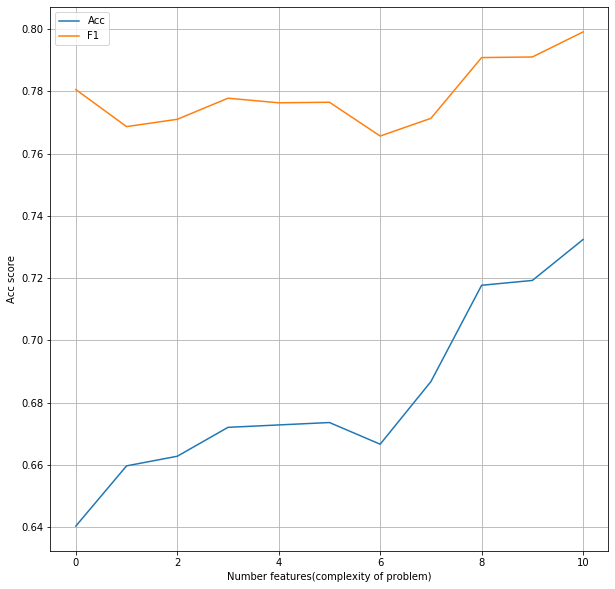

In [157]:
penalty='l2'
scores_acc = []
scores_f1 = [] 
for x in range(1,X_train.shape[1]):
    lr = LogisticRegression(C =1e2,penalty=penalty,max_iter=100,solver='liblinear',multi_class='ovr')
    lr.fit(X_train[:,:x].reshape(-1,1) if x==1 else X_train[:,:x],y_train)
    scores_acc.append(lr.score(X_test[:,:x].reshape(-1,1) if x==1 else X_test[:,:x],y_test))
    scores_f1.append(f1_score(lr.predict(X_test[:,:x].reshape(-1,1) if x==1 else X_test[:,:x]),y_test))
plt.figure(figsize=(10,10))
plt.plot(scores_acc,label='Acc')
plt.plot(scores_f1,label='F1')
plt.xlabel('Number features(complexity of problem)')
plt.ylabel('Acc score')
plt.legend()

plt.grid(True)

In [158]:
scores = []
score_f1 = [] 
for x in np.linspace(1,100,100):
    lr = LogisticRegression(C =1e-2,penalty=penalty,max_iter=10000,solver='lbfgs',multi_class='multinomial',random_state=1)
    lr.fit(X_train[:int(X_train.shape[0]*(1/x)),:],y_train[:int(X_train.shape[0]*(1/x))])
    scores.append(lr.score(X_test,y_test))
    score_f1.append(f1_score(lr.predict(X_test
                                       ),y_test))

0.7362722351121423

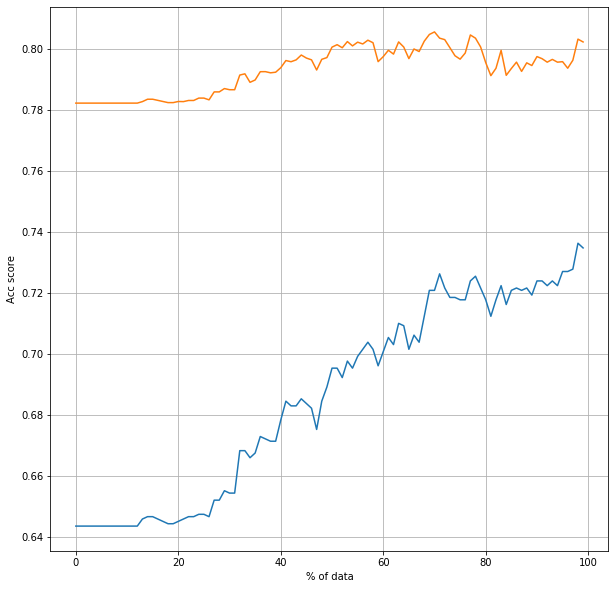

In [159]:
plt.figure(figsize=(10,10))
plt.plot(scores[::-1],label='Acc')
plt.plot(score_f1[::-1],label='F1')
plt.xlabel('% of data')
plt.ylabel('Acc score')
plt.grid(True)
max(scores)

S'enten que aquests pics son a mesura que es va equilibrant la qualitat dels vins el model es mes capaç de predir amb certesa.

Tot i aconseguir un màxim en el 100% de les dades com s'esperaria d'un bon model amb unes bones dades, es lluita per aconseguir una accuracy millor.

Es fa servir el dataset + box cox + pca (amb aquest dataset els solvers saga i sag milloren la seva eficiencia fins a ser els un dels que millors resultats donen)

0.7432327919566899


0.8179824561403509

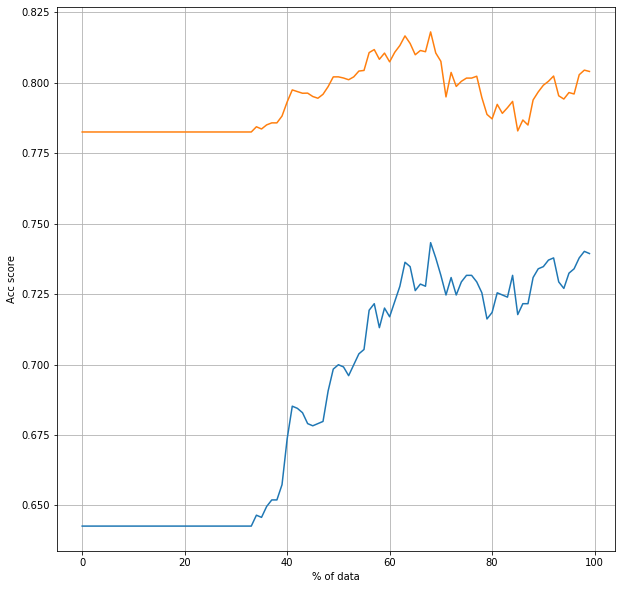

In [160]:

scores = []
score_f1 = [] 
for x in np.linspace(1,100,100):

    lr = LogisticRegression(C =1e-1,penalty="l1",max_iter=10000,solver='saga',multi_class='ovr')
    lr.fit(X_train[:int(X_train.shape[0]*(1/x)),:],y_train[:int(X_train.shape[0]*(1/x))])
    scores.append(lr.score(X_test,y_test))
    score_f1.append(f1_score(lr.predict(X_test),y_test))
plt.figure(figsize=(10,10))
plt.plot(scores[::-1],label='Acc')
plt.plot(score_f1[::-1],label='F1')
plt.xlabel('% of data')
plt.ylabel('Acc score')
plt.grid(True)
print(max(scores))
max(score_f1)

Aquesta grafica ens mostra que amb el solver saga i 1000 iteracions s'aconsegyeux regularitzar el aprenentatge i intentare comprobar si s'ha generalitzat el aprenentatge en el apartat D.

In [161]:
scores = []
score_f1 = [] 
for x in np.linspace(1,100,100):

    lr = LogisticRegression(C =1,penalty="l2",max_iter=x,solver='lbfgs',multi_class='ovr')
    lr.fit(X_train,y_train)
    scores.append(lr.score(X_test,y_test))
    score_f1.append(f1_score(lr.predict(X_test),y_test))

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

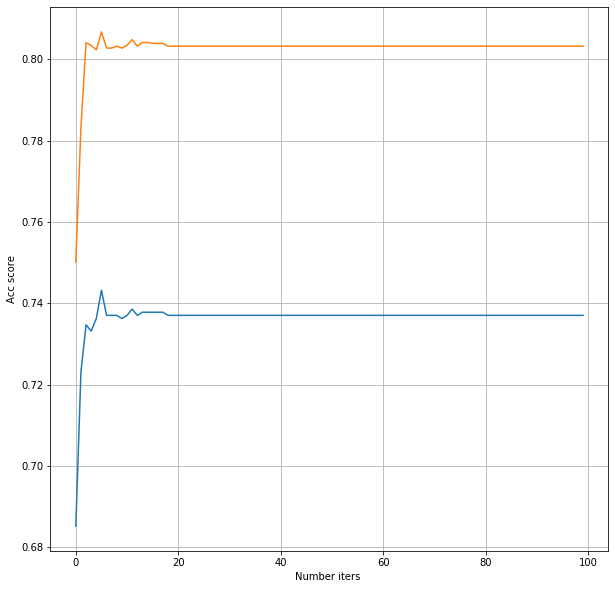

In [162]:
plt.figure(figsize=(10,10))
plt.plot(scores,label='Acc')
plt.plot(score_f1,label='F1')
plt.xlabel('Number iters ')
plt.ylabel('Acc score')
plt.grid(True)

Podem veure que actualment el model convergeix rapidament cap a una solució relativament acceptable

S'aprecia que les diferenecies entre iteracions depenen també del solver; per exemple lbfgs,liblinear i newton-cg es poden considerar que convergeixen rapid degut a que no hi ha diferencia entre les 1000 i les 10000 iteracions. Per altra banda sag i saga si que necessitaben mes iteracions per poder reduïr les diferencies de mitjana respecte els altres solvers

## D. Demostració Error de Variance (20%)

* Què hem de fer per veure que el model que estem provant té un error de variança molt alt? (es a dir, model massa complexe)

* Crea models de features més complexes amb [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* Podem reduir el error de variança si enlloc de classificar el vi blanc i el negre, els separessim?

* Sabrieu explicar-me aquesta [gráfica](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)? Podeu generar-la amb aquestes dades de entrenament?



Per determinar que un model es massa complexe hauriem d'agafar el mateix problema però amb un altre conjunt de dades i probar si el model ha adquirit el coneixement generic que se li demanaba. Tambés es podria mirant fent un k-fold i veient que la diferencia d'errors entre els diferents folds no es gairte alta. El model generalitza.

Tal i com s'ha dit que s'intentaria comprobar; es farà servir un k fold per mirar si el model amb saga està prou regularitzat

In [164]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(C =1e-1,penalty="l2",max_iter=10000,solver='saga')
#clfs[sd2[sd2.accuracy == sd2.accuracy.max()]['degree']]
scores = cross_validate(lr, X_train2,y_train2, cv=5)
print(f"Mean of scores: {scores['test_score'].mean()*100}% +- {scores['test_score'].std()}%")


Mean of scores: 74.93230174081239% +- 0.0055185077824708535%


Es pot apreciar com despres de fer un tractament especial amb les dades i encaixar-les en uns hiperparàmetres concrets s'ha aconseguit reduïr el error de bias i de variança, ara es farà el mateix però amb un model que tingui una variança molt mes alta.

In [165]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
clf = linear_model.LogisticRegression(C=1e-2,max_iter=1000,penalty='l2')
clf.fit(X_train2,y_train)
pred = clf.predict(X_test2)
(accuracy_score(y_test,pred)),(f1_score(y_test,pred))

(0.7563805104408353, 0.8186528497409326)

Amb un polinomi de grau 2 es millora el performance respecte el testing(supera 75%) , es farà la proba amb més graus:

In [166]:

info = {'degree':[],'accuracy':[],'f1_score':[]}
clfs = []
for x in range(1,5):
    info['degree'].append(x)

    poly = PolynomialFeatures(x)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    
    clf = linear_model.LogisticRegression(C=1e-2,max_iter=1000,penalty='l2')
    clf.fit(X_train2,y_train)
    
    clfs.append(clf)
    pred = clf.predict(X_test2)
    info['accuracy'].append(accuracy_score(y_test,pred))
    info['f1_score'].append(f1_score(y_test,pred))
df2 = pd.DataFrame(info)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [167]:
df2

,degree,accuracy,f1_score
0,1,0.734,0.803
1,2,0.756,0.819
2,3,0.776,0.828
3,4,0.781,0.830


Amb unb polinomi de grau 4 s'aconsegueix el màxim performance sobre el testing per el model fins ara.(Superant el 78%)

## Separant vi vermell i blanc

A la pregunta de si separar els vins per tipus podria ajudar a separar millor la seva qualitat, la única resposta que queda es probar-ho, tot i que es un reenfoc del problema, ara el nostre model que distinguirà la qualitat dels vins estarà format per dos models que funcionaràn en funció del tipus de vi que sigui.

In [168]:
white_df = dataset[dataset.is_red_wine==0]
red_df = dataset[dataset.is_red_wine==1]

quality_raw = white_df['quality_categorical']
features_raw = white_df.drop(['quality_categorical','type','quality'],axis=1)
quality_raw2 = red_df['quality_categorical']
features_raw2 = red_df.drop(['quality_categorical','type','quality'],axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_raw2, 
                                                    quality_raw2, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)


scalar=StandardScaler()

X_train1=scalar.fit_transform(X_train1)
X_test1=scalar.fit_transform(X_test1)
X_train2=scalar.fit_transform(X_train2)
X_test2=scalar.fit_transform(X_test2)

lr_w = LogisticRegression(C=1e-2,max_iter=1000,solver='saga',penalty='l2')

lr_w.fit(X_train1,y_train1)
lr_r = LogisticRegression(C=1e-2,max_iter=1000,solver='saga',penalty='l2')
lr_r.fit(X_train2,y_train2)
print(f'Accuracy (sobre testing) del vi blanc: {lr_w.score(X_test1,y_test1)}')
print(f'Accuracy (sobre testing)  del vi rosat: {lr_r.score(X_test2,y_test2)}')


Accuracy (sobre testing) del vi blanc: 0.7700205338809035
Accuracy (sobre testing)  del vi rosat: 0.7241379310344828


Separant per vins s'aconsegueix una millora respecte la versió sense afegir features polinómics. Com a penúltim intent de millorar el model s'intentarà aplicar a cada model de vins les versions polinomials

In [172]:
info = {'degree':[],'accuracy':[],'f1_score':[],'red':[]}
clfs = []
for x in range(1,5):
        info['red'].append( 0)
        info['degree'].append(x)

        poly = PolynomialFeatures(x)
        lr = LogisticRegression(C=1e-2,max_iter=1000,solver='saga',penalty='l2')
        X_train_ = poly.fit_transform(X_train1 )
        X_test_ = poly.fit_transform(X_test1)

        
        lr.fit(X_train_,y_train1)
        pred = lr.predict(X_test_)
        info['accuracy'].append(accuracy_score(y_test1 ,pred))
        info['f1_score'].append(f1_score(y_test1 ,pred))
df2 = pd.DataFrame(info)
df2

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,degree,accuracy,f1_score,red
0,1,0.770,0.844,0
1,2,0.777,0.848,0
2,3,0.776,0.847,0
3,4,0.730,0.825,0


In [171]:
info = {'degree':[],'accuracy':[],'f1_score':[],'red':[]}
clfs = []
for x in range(1,5):
        info['red'].append( 1)
        info['degree'].append(x)

        poly = PolynomialFeatures(x)
        lr = LogisticRegression(C=1e-2,max_iter=1000,solver='saga',penalty='l2')
        X_train_ = poly.fit_transform(X_train2 )
        X_test_ = poly.fit_transform(X_test2)

        
        lr.fit(X_train_,y_train2)
        pred = lr.predict(X_test_)
        info['accuracy'].append(accuracy_score(y_test2 ,pred))
        info['f1_score'].append(f1_score(y_test2 ,pred))
df3 = pd.DataFrame(info)
df3

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,degree,accuracy,f1_score,red
0,1,0.724,0.746,1
1,2,0.727,0.742,1
2,3,0.718,0.719,1
3,4,0.683,0.717,1


En ambdos casos podem veure com el màxim l'aconseguim amb un polinomi de grau 2 i que a mesura que crreix la complexitat el accuracy sobre el test falla, ens trobem amb overfitting. 

Com a últim intent es fa un grid search per diferents paràmetres en cada vi per veure si ens estàbem deixant algun model que ho fes millor.

In [107]:
def grid_search( clf, x_train, y_train):
        # Logistic Regression 
        log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'max_iter':[1000],'solver':['liblinear','saga']}
        grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
        grid_log_reg.fit(x_train, y_train)
        # We automatically get the logistic regression with the best parameters.
        log_reg = grid_log_reg.best_estimator_
        print("Best Parameters for Logistic Regression: ", grid_log_reg.best_estimator_)
        print("Best Score for Logistic Regression: ", grid_log_reg.best_score_)
        return log_reg


lr_w,lr_r = grid_search(lr_w,X_train1,y_train1),grid_search(lr_r,X_train2,y_train2)
print(f'Vi blanc testing  classification aconseguim: {lr_w.score(X_test1,y_test1)} ')
print(f'Vi vermell testing whine classification aconseguim: {lr_r.score(X_test2,y_test2)} ')

Best Parameters for Logistic Regression:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best Score for Logistic Regression:  0.7510289325565321
Best Parameters for Logistic Regression:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best Score for Logistic Regression:  0.751959240389069
For white whine classification aconseguim: 0.7751540041067762 
For red whine classification aconseguim: 0.7147335423197492 


## Interpreta la grafica

La grafica esxplica com acaben els pesos a mesura que es va fent gran la C, es a dir que es comença donant-li molt pes a la regularització i s'acaba donant pes només a la optimització. El codi per generarla esta a continuació

In [173]:
coef = []
for c in np.logspace(-9,-1,200):
    clf = linear_model.LogisticRegression(C=c,max_iter=10000,penalty='l2')
    clf.fit(X_train,y_train)
    coef.append(clf.coef_)

In [174]:
coefs = {x:[] for x in range(len(coef[0].reshape(1,-1).flatten()))}
for x in coef:
    for y in coefs:
        coefs[y].append(x.reshape(1,-1).flatten()[y])

In [175]:

coefs = {x:np.asarray(coefs[x]) for x in coefs}

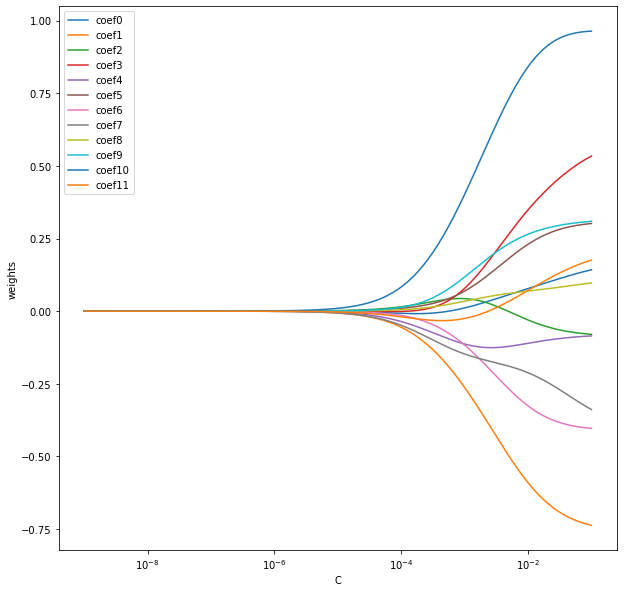

In [176]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
[plt.plot(np.logspace(-9,-1,200),coefs[x].flatten(),label=f'coef{x}') for x in coefs]
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('weights')
ax.legend()

Principalment el que ens vol mostrar aquesta gfràfica es que a mesura que se li dona importancia al factor de regularització els pesos es troben al voltant del 0; per altra banda si fas creixer la C ( disminuïnt així el factor de regularització) els pesos prenen valors mes o menys grans depenent també de la mgnitud del penalty( si es molt gran suplirà el decreixement de C)

## Logistic Regressor GD ( Extra, implementació propia)

In [218]:
import random
class LogisticRegressor(object):
    
    def __init__(self,alpha,lambd):
        self.estimator = self
        self.lr = alpha
        self.lambd = lambd
        self.norms = {'l2':lambda x,m: 2*self.lambd*np.sum(self.coefs)/m}
    def sigmoid(self,X):
        #Sigmoid overflows
        return .5 * (1 + np.tanh(.5 * X))
    
    
    def predict(self,X):
        return self.sigmoid(self.coefs@X.T)
    def norm(self,coef,m,typ='l2'):
        return self.norms[typ](coef,m)
    
    def regulize(self,coef,m,typ='l2'):
        return self.norm(coef,m,typ=typ)
    def __update2(self,X,y):
        #sumem epsilon perque log(0)=inf
        epsilon = 1e-9    
        m=len(X)
        h = self.predict(X)
        error = h - y
        self.coefs -= ((self.lr * np.dot(X.T,error)/m) +  self.regulize(self.coefs,m))
        return -np.average(y*np.log(h+epsilon) + (1-y)*np.log(1-h + epsilon)) + (self.lambd/m) * (np.dot(self.coefs.T,self.coefs))
    
    def __update(self,X,y):
        epsilon = 1e-5
        m=len(X)
        h = self.predict(X)
        error = h-y
 
        self.coefs -= (self.lr * (1/m) * np.dot(X.T, error)).reshape(1,-1).flatten()
        return -np.average(y*np.log(h+epsilon) + (1-y)*np.log(1-h + epsilon))
    
    def score(self,X,Y):
        return np.sum(X==Y)/X.shape[0]
    def fit(self,X,y,max_iter=1000,epsilon=1e-3):
        setattr(self,"coefs",np.asarray([0. for x in range(X.shape[1])]))
        errors = [np.inf]
        it = 0
        while it < max_iter and errors[-1]>epsilon:
            it+=1
            pdate = self.__update2(X,y)

            errors.append(pdate)
        return errors

Sense regularitzar:

In [219]:
clf1 = LogisticRegressor(alpha=0.1,lambd=10)
y_t = np.asarray(y_train )
err =clf1.fit(np.c_[np.ones(X_train.shape[0]),X_train],y_t)

Regularitzant:

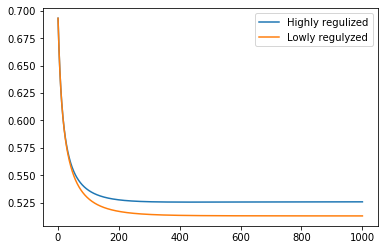

In [221]:
clf2 = LogisticRegressor(alpha=0.1,lambd=0.01)
y_t = np.asarray(y_train )
err2 =clf2.fit(np.c_[np.ones(X_train.shape[0]),X_train],y_t)
plt.figure()
plt.plot(err,label='Highly regulized')
plt.plot(err2,label='Lowly regulyzed')
plt.legend()

In [222]:
f1_score(np.round(clf2.predict(np.c_[np.ones(X_test.shape[0]),X_test])),y_test)

0.8032407407407407

In [223]:
f1_score(np.round(clf2.sigmoid(clf2.coefs @  np.c_[np.ones(X_test.shape[0]),X_test].T)),y_test)

0.8032407407407407

In [224]:
accuracy_score(np.round(clf2.sigmoid(clf.coefs @  np.c_[np.ones(X_test.shape[0]),X_test].T)),y_test)

0.737045630317092

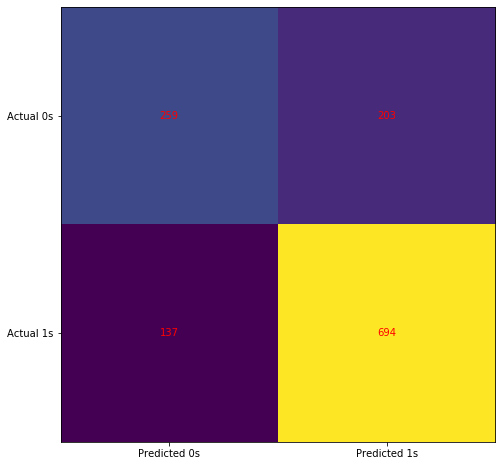

In [225]:
a = clf.predict(np.c_[np.ones(X_test.shape[0]),X_test])
a[a>0.50] = 1
a[a<0.50] = 0
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,a)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [632]:
f1_score(a,y_test)

0.8032407407407407